In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

data_SVN = {
        "PLS": [[15, 5], [8, 11]],
        "SVM": [[15, 5], [8, 11]],
        "CARS": [[18, 2], [7, 12]],
        "GA-iPLS": [[19, 1], [2, 17]],
        "BOSS": [[19, 1], [2, 17]],
        "GA-iPLS + BOSS": [[19, 3], [2, 17]],
}
w_MSC = {
        "PLS": 2101,
        "SVM": 2101,
        "CARS": 16,
        "GA-iPLS": 546,
        "BOSS": 32,
        "GA-iPLS + BOSS": 10,
        # "GA-iPLS + CARS": 13,
}

data_MSC = {
        "PLS": [[16, 5], [4, 15]],
        "SVM": [[15, 6], [3, 16]],
        "CARS": [[16, 5], [4, 15]],
        "GA-iPLS": [[16, 5], [2, 17]],
        "BOSS": [[18, 3], [2, 17]],
        "GA-iPLS + BOSS": [[18, 3], [3, 16]],
        # "GA-iPLS + CARS": [[16, 5], [4, 15]],
}
w_SVN = {
        "PLS": 2101,
        "SVM": 2101,
        "CARS": 16,
        "GA-iPLS": 819,
        "BOSS": 46,
        "GA-iPLS + BOSS": 89,
        # "GA-iPLS + CARS": [[16, 5], [4, 15]],
}

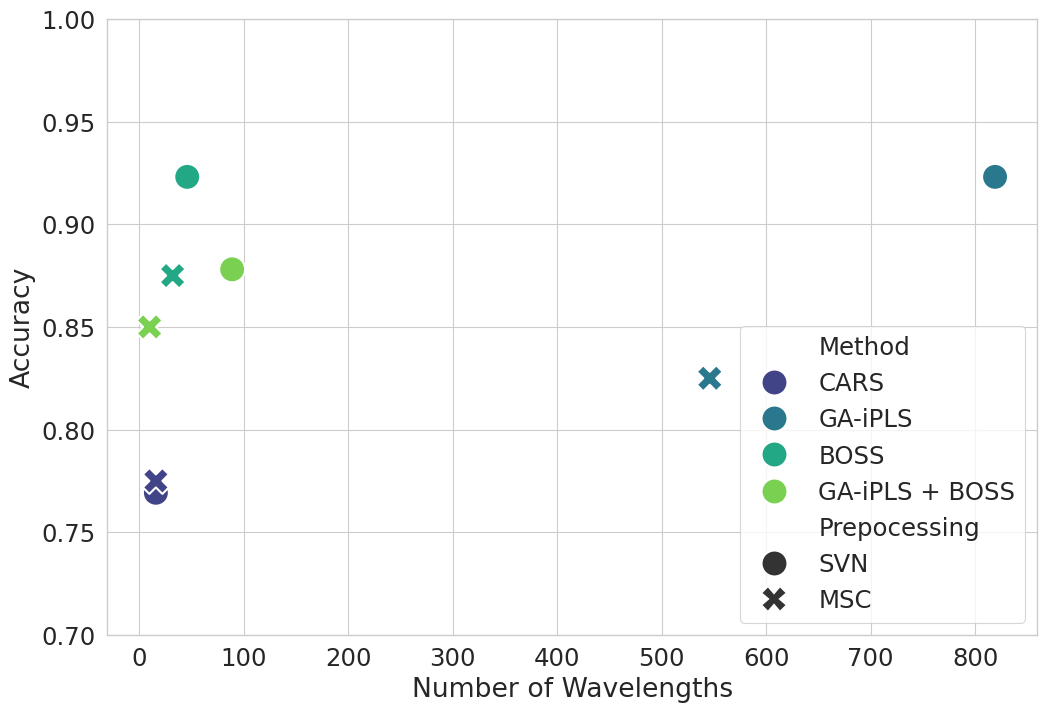

In [ ]:
# Calculate accuracy
def calculate_accuracy(data, w, Algorithm):
    accuracies = []
    for key, value in data.items():
        # Calculate accuracy as the ratio of correct predictions to total predictions
        accuracy = (value[0][0] + value[1][1]) / (value[0][0] + value[0][1] + value[1][0] + value[1][1])
        accuracies.append([Algorithm,key,w[key],accuracy])
    return accuracies

accuracis = calculate_accuracy(data_SVN, w_SVN, "SVN")
accuracis.extend(calculate_accuracy(data_MSC, w_MSC, "MSC"))

df = pd.DataFrame(accuracis, columns=["Prepocessing", "Algorithm", "Wavelengths", "Accuracy"])

# Step 3: Filter out rows with Wavelengths = 1133
filtered_df = df[df["Wavelengths"] != 2101]

# Step 4: Ensure the directory for saving plots exists
os.makedirs("plots", exist_ok=True)

# Step 5: Increase font size and figure size for the plot
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=2)  # Adjust font scale for better readability

# Step 6: Create scatter plot with seaborn
sns.scatterplot(data=filtered_df, x="Wavelengths", y="Accuracy", hue="Algorithm", style="Prepocessing", s=350, palette='viridis')

plt.xlabel("Number of Wavelengths")
plt.ylabel("Accuracy")
# plt.legend(title="Legend")
# plt.title("Accuracy")
plt.ylim(0.7, 1.0)
plt.grid(True)

# Show and save the plot
plt.savefig("plots/best_accuracy_plot.pdf")
plt.show()
plt.close()